In [50]:
import _pickle as cPickle
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'Open Sans',
        'weight' : 'normal',
        'size'   : 15}

import matplotlib as mpl
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

from pickle_loader import get_hrt_hmi_arr_from_pickles_45s, get_hrt_hmi_arr_from_pickles_720s
from flux_calculations import get_fluxes

import sunpy.visualization.colormaps
magmap = mpl.colormaps['hmimag']

from datetime import datetime as dt
from datetime import timedelta
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d/%m %H:%M')

In [2]:
folder = '/data/slam/sinjan/arlongterm_pickles_hann_SL/'

In [3]:
#m_45s with psf applied and straylight
folder = '/data/slam/sinjan/arlongterm_pickles_hann_SL/'
hrt_series = 'blos'
hmi_series = 'm_45s'
hrt_psf = '_hmipsf_True'
hrt_arr,hmi_arr,hrt_meta_list =  get_hrt_hmi_arr_from_pickles_45s(folder, hrt_series, hmi_series, hrt_psf, hrt_suffix = '', hmi_suffix = '', year = '2023')

/scratch/slam/sinjan/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#ic_45s with psf applied and straylight
folder = '/data/slam/sinjan/arlongterm_pickles_hann_SL/'
hrt_series = 'icnt'
hmi_series = 'ic_45s'
hrt_psf = '_hmipsf_True'
hrt_ic_arr,_,_ =  get_hrt_hmi_arr_from_pickles_45s(folder, hrt_series, hmi_series, hrt_psf, hrt_suffix = '', hmi_suffix = '', year = '2023')

In [5]:
with open('/data/slam/sinjan/arlongterm_pickles_hann_SL/hrt_mu_arr.npy','rb') as f:
    hrt_mu_arr=np.load(f)

with open('/data/slam/sinjan/arlongterm_pickles_hann_SL/hmi_mu_arr.npy','rb') as f:
    hmi_mu_arr=np.load(f)

In [6]:
times = [dt.strptime(i['date-obs'][:-4],'%Y-%m-%dT%H:%M:%S') for i in hrt_meta_list]

In [7]:
with open('/data/slam/sinjan/arlongterm_pickles/hmi_ic_720_nolimbdark_20231012_20231017.npy','rb') as f:
    hmi_ic_720s_nolimbdark=np.load(f)

In [ ]:
(hrt_unsigned_flux, hmi_unsigned_flux), (hrt_mus, hmi_mus), (hrt_unsigned_flux_mu_corr, hmi_unsigned_flux_mu_corr) = get_fluxes(hrt_arr, hmi_arr, hrt_ic_arr, hmi_ic_720s_nolimbdark, hrt_mu_arr, hmi_mu_arr, noise_level=50, filter_bleft_corner=True, ic_threshold=0.55) 

HRT mag shape: (4102, 4102, 129)
HMI mag shape: (4102, 4102, 129)
HRT mu shape: (4102, 4102, 129)
HMI mu shape: (4102, 4102, 129)
HRT ic shape: (4102, 4102, 129)
HMI ic shape: (4098, 4098, 128)
Time steps: 128


In [45]:
hrt_flux_rate_mu = np.diff(hrt_unsigned_flux_mu_corr)
hmi_flux_rate_mu = np.diff(hmi_unsigned_flux_mu_corr)

In [46]:
hrt_flux_rate_mu[71]=hrt_flux_rate_mu[71]/4
hmi_flux_rate_mu[71]=hmi_flux_rate_mu[71]/4

In [47]:
hmisize=2.42407e-6*1.496e8*1e5

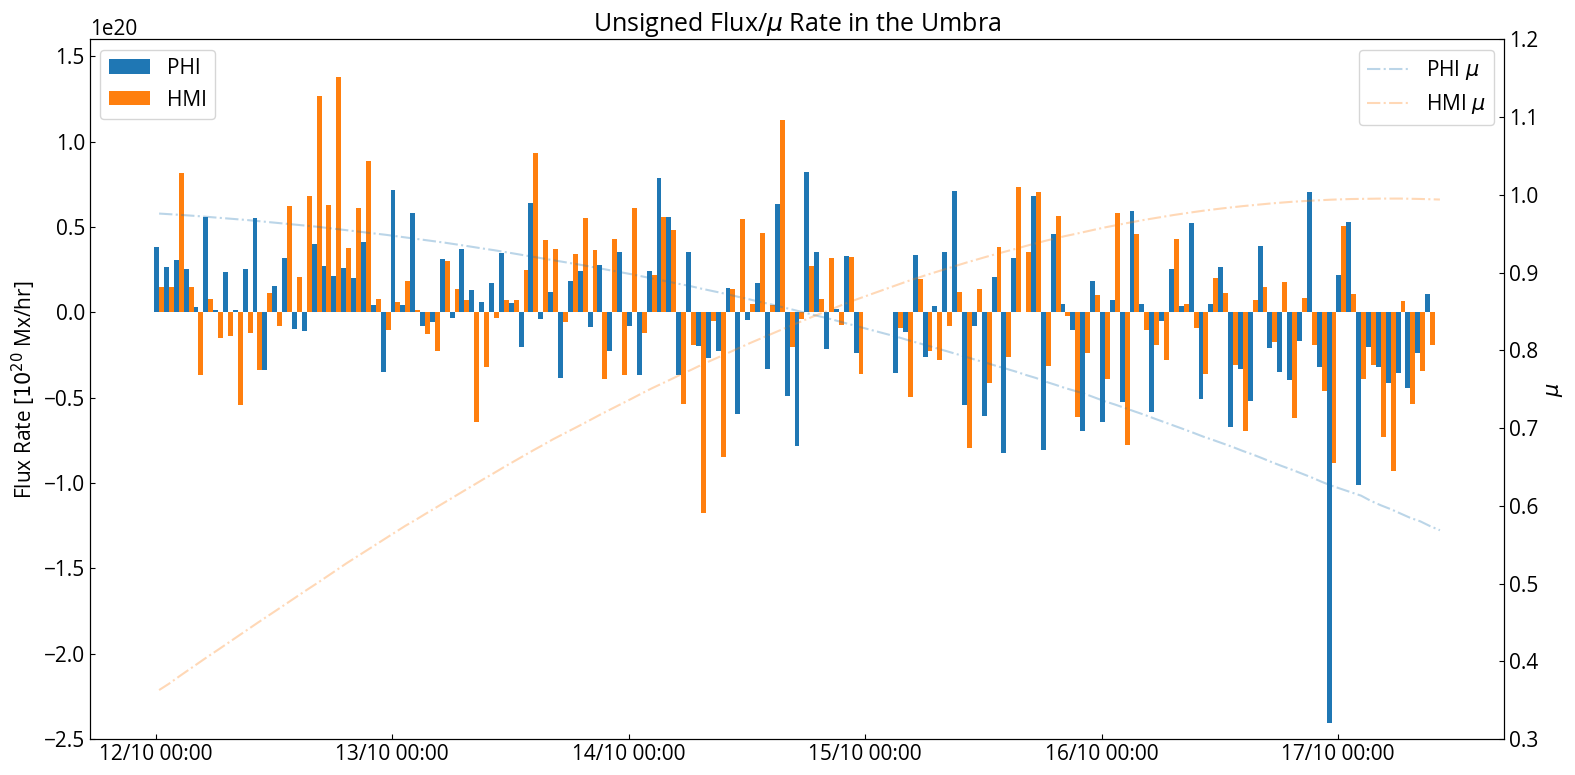

In [48]:
plt.figure(figsize=(16,8))

hrt_x = [i - timedelta(minutes=15) for i in times[:-1]]
hmi_x = [i + timedelta(minutes=15) for i in times[:-1]]
plt.bar(hrt_x, hrt_flux_rate_mu*hmisize**2,label=r'PHI',color='#1f77b4',alpha=1,width=timedelta(minutes=30))
plt.bar(hmi_x, hmi_flux_rate_mu*hmisize**2,label=r'HMI',color='#ff7f0e',alpha=1,width=timedelta(minutes=30))

plt.ylim(-2.5e20,1.6e20)
plt.ylabel(r'Flux Rate [$10^{20}$ Mx/hr]')
plt.legend(loc='upper left')
ax=plt.gca()
ax2=ax.twinx()

ax2.plot(times,hrt_mus,label='PHI $\mu$', color='#1f77b4',alpha=0.3,linestyle='-.')
ax2.plot(times,hmi_mus,label='HMI $\mu$', color='#ff7f0e',alpha=0.3,linestyle='-.')
plt.ylim(0.3,1.2)
plt.legend(loc='upper right')
plt.title(r'Unsigned Flux/$\mu$ Rate in the Umbra') #[{times[0].date()} :: {times[-1].date()}]
plt.ylabel(r'$\mu$')
plt.xlabel('Time [UTC]')
ax=plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
#plt.savefig('../plots/umbra_LoS_flux_divmu_phi.png',bbox_inches='tight',dpi=300

In [43]:
times[71:75]

[datetime.datetime(2023, 10, 14, 23, 19, 59),
 datetime.datetime(2023, 10, 15, 3, 19, 59),
 datetime.datetime(2023, 10, 15, 4, 19, 59),
 datetime.datetime(2023, 10, 15, 5, 19, 59)]

In [14]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

In [15]:
hmi_vr = [round(i['obs_vr']/1000,3) for i in hrt_meta_list]

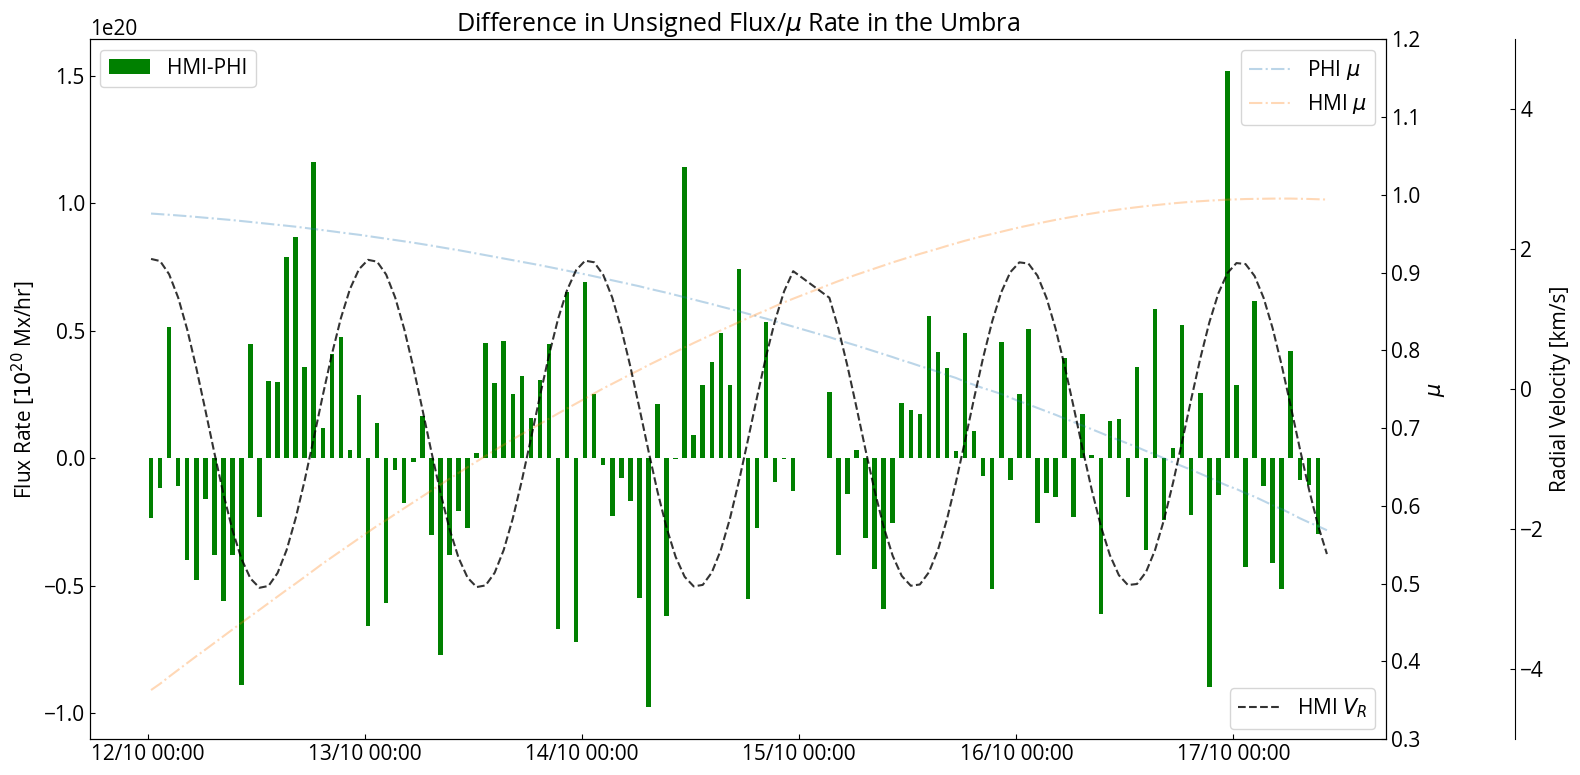

In [ ]:
plt.figure(figsize=(16,8))

plt.bar(times[:-1], (hmi_flux_rate_mu-hrt_flux_rate_mu)*hmisize**2,label=r'HMI-PHI',color='green',alpha=1,width=timedelta(minutes=30))

#plt.ylim(-2.5e20,1.6e20)
plt.ylabel(r'Flux Rate [$10^{20}$ Mx/hr]')
plt.legend(loc='upper left')

ax=plt.gca()
ax2=ax.twinx()
ax3=ax.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
ax3.spines["right"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(ax3)
# Second, show the right spine.
ax3.spines["right"].set_visible(True)

ax2.plot(times,hrt_mus,label='PHI $\mu$', color='#1f77b4',alpha=0.3,linestyle='-.')
ax2.plot(times,hmi_mus,label='HMI $\mu$', color='#ff7f0e',alpha=0.3,linestyle='-.')

ax2.set_ylabel(r'$\mu$')
ax2.set_ylim(0.3,1.2)
ax2.legend(loc='upper right')

ax3.plot(times,hmi_vr,label=r'HMI $V_{R}$',alpha=0.8,color='black',linestyle='--')
ax3.set_ylabel(r'Radial Velocity [km/s]')
ax3.set_ylim(-5,5)
ax3.legend(loc='lower right')


plt.title(r'Difference in Unsigned Flux/$\mu$ Rate in the Umbra') #[{times[0].date()} :: {times[-1].date()}]

plt.xlabel('Time [UTC]')
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
#plt.savefig('../plots/umbra_LoS_flux_divmu_phi.png',bbox_inches='tight',dpi=300

In [51]:
(hrt_unsigned_flux_tot, hmi_unsigned_flux_tot), (hrt_mus, hmi_mus), (hrt_unsigned_flux_tot_mu_corr, hmi_unsigned_flux_tot_mu_corr) = get_fluxes(hrt_arr, hmi_arr, hrt_ic_arr, hmi_ic_720s_nolimbdark, hrt_mu_arr, hmi_mu_arr, noise_level=50, filter_bleft_corner=True, ic_threshold=1.5) 

TypeError: get_fluxes() got an unexpected keyword argument 'ic_threshold'

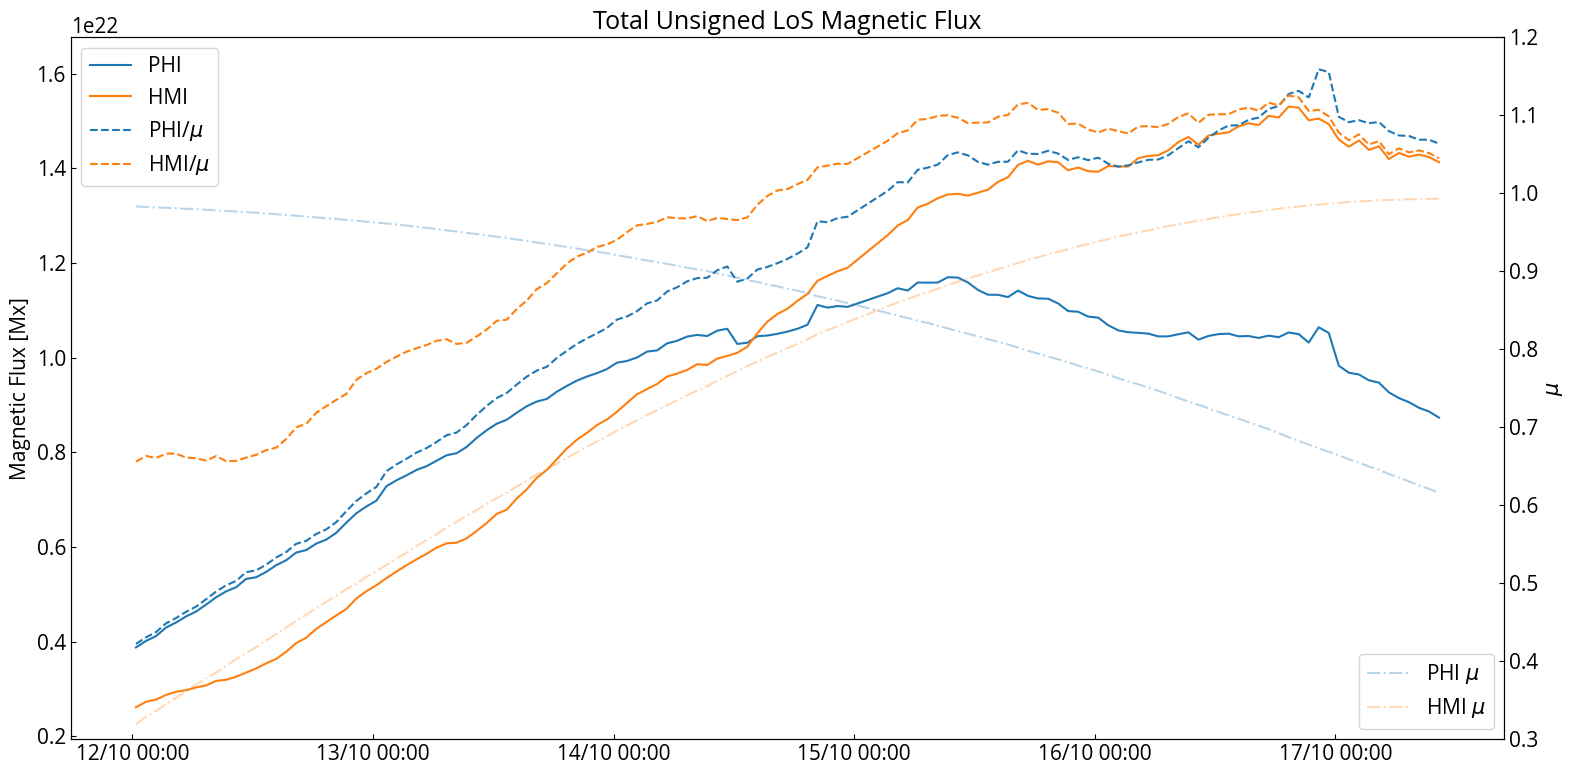

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(times,hrt_unsigned_flux_tot*hmisize**2,label=r'PHI',color='#1f77b4')
plt.plot(times,hmi_unsigned_flux_tot*hmisize**2,label=r'HMI',color='#ff7f0e')

plt.plot(times,hrt_unsigned_flux_tot_mu_corr*hmisize**2,color='#1f77b4',linestyle='--', label=r'PHI/$\mu$') #label=r'HRT/$\mu$'
plt.plot(times,hmi_unsigned_flux_tot_mu_corr*hmisize**2,color='#ff7f0e',linestyle='--', label=r'HMI/$\mu$') #,

plt.ylabel('Magnetic Flux [Mx]')
plt.legend(loc='upper left')
ax=plt.gca()
ax2=ax.twinx()

ax2.plot(times,hrt_mus,label='PHI $\mu$', color='#1f77b4',alpha=0.3,linestyle='-.')
ax2.plot(times,hmi_mus,label='HMI $\mu$', color='#ff7f0e',alpha=0.3,linestyle='-.')

plt.ylim(0.3,1.2)
plt.legend(loc='lower right')
plt.title(f'Total Unsigned LoS Magnetic Flux')
plt.ylabel(r'$\mu$')
plt.xlabel('Time [UTC]')
ax=plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
#plt.savefig('../plots/umbra_LoS_flux_divmu_phi.png',bbox_inches='tight',dpi=300)

(1950.0, 2550.0)

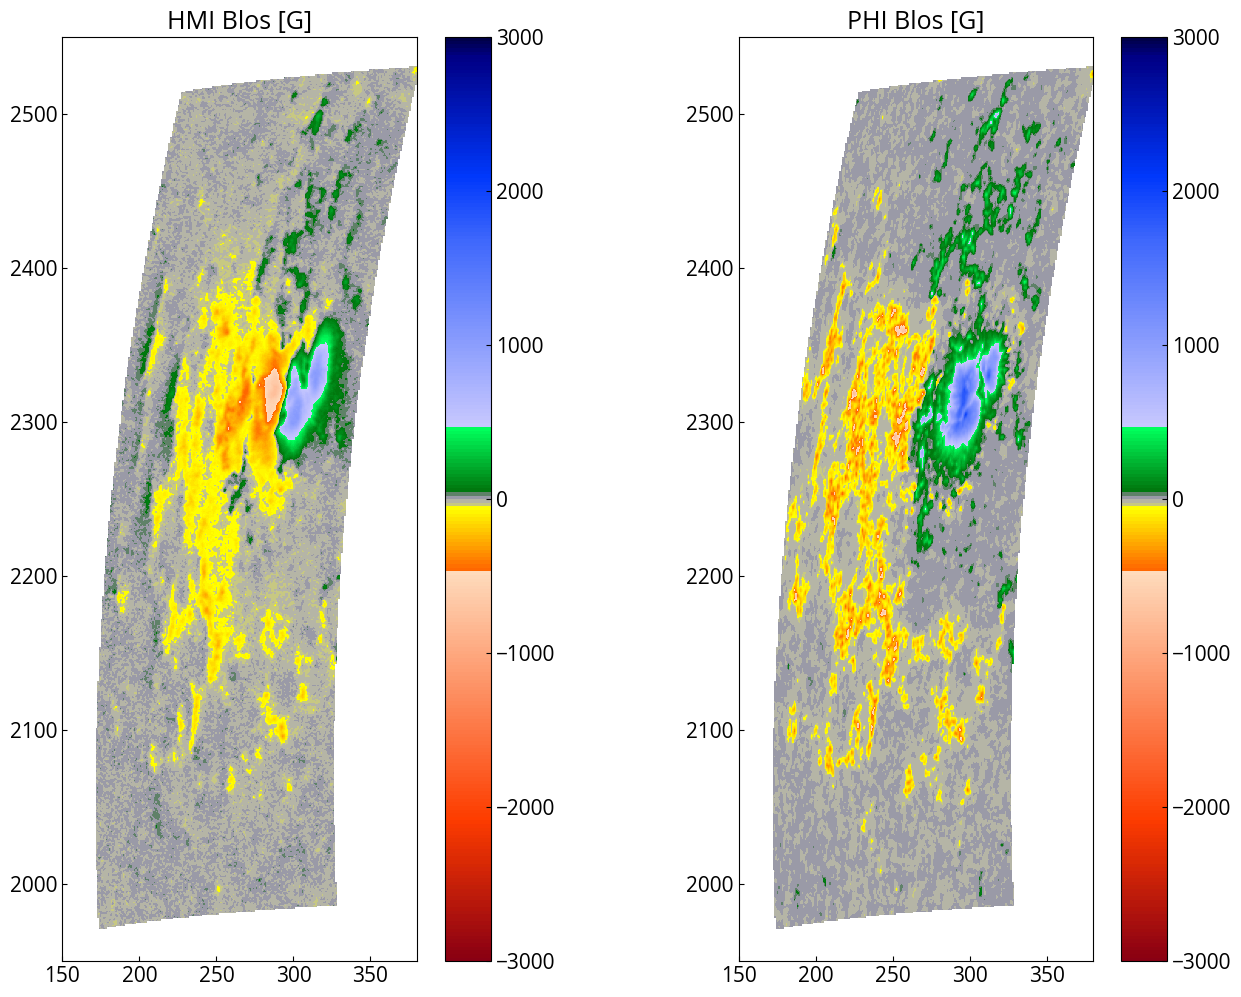

In [89]:
plt.figure(figsize=(16,12))
plt.subplot(121)
plt.imshow(hmi_arr[2:-2,2:-2,0],origin="lower",cmap=magmap,vmin=-3000,vmax=3000)
plt.colorbar()
plt.xlim(150,380)
plt.ylim(1950,2550)
plt.title('HMI Blos [G]')
plt.subplot(122)
plt.imshow(hrt_arr[2:-2,2:-2,0],origin="lower",cmap=magmap,vmin=-3000,vmax=3000)
plt.colorbar()
plt.title('PHI Blos [G]')
plt.xlim(150,380)
plt.ylim(1950,2550)

(1950.0, 2550.0)

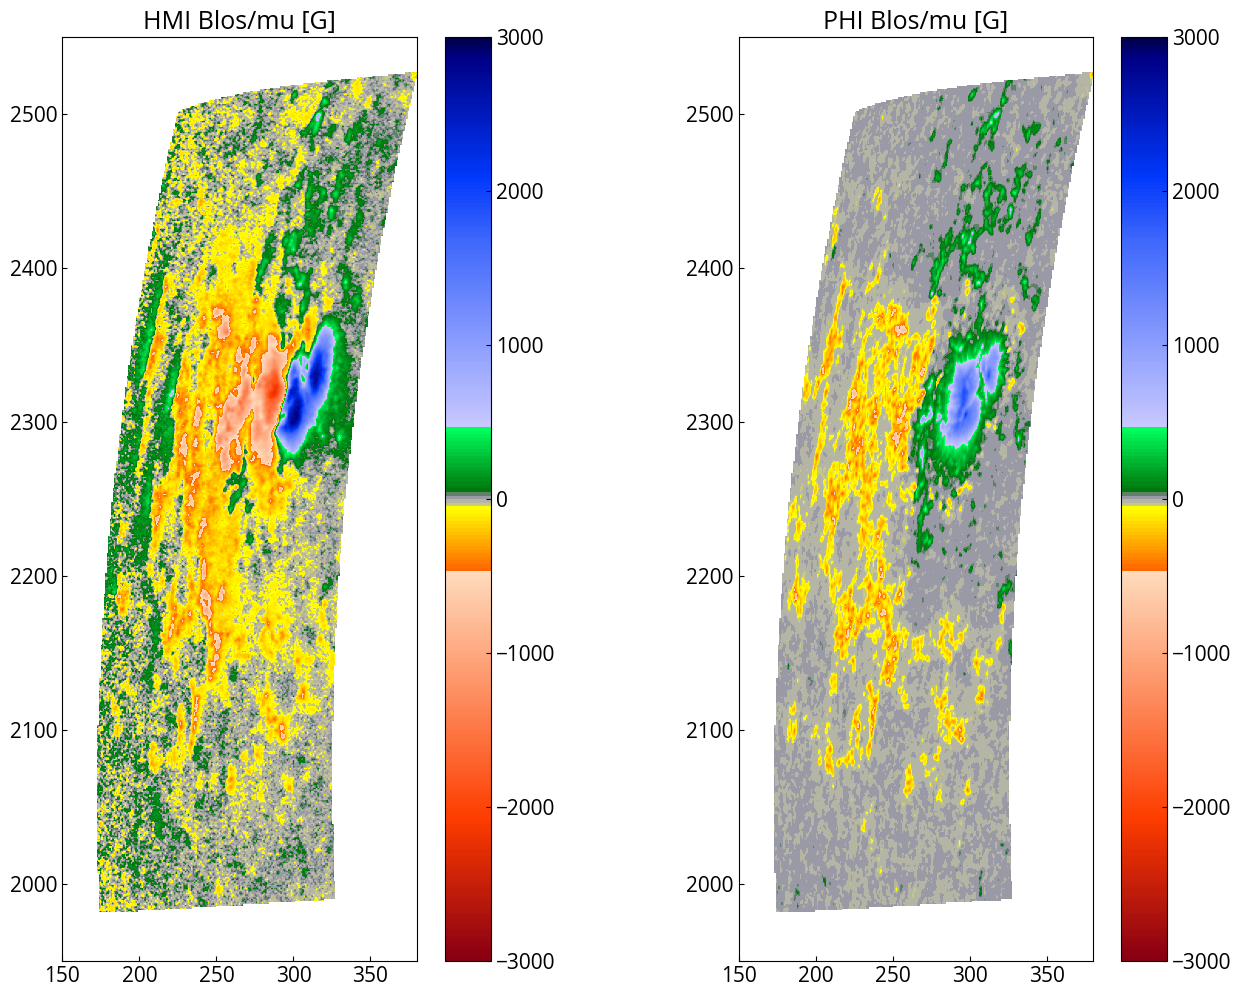

In [88]:
plt.figure(figsize=(16,12))
plt.subplot(121)
plt.imshow(hmi_arr[2:-2,2:-2,0]/hmi_mu_arr[2:-2,2:-2,0],origin="lower",cmap=magmap,vmin=-3000,vmax=3000)
plt.colorbar()
plt.xlim(150,380)
plt.ylim(1950,2550)
plt.title('HMI Blos/mu [G]')
plt.subplot(122)
plt.imshow(hrt_arr[2:-2,2:-2,0]/hrt_mu_arr[2:-2,2:-2,0],origin="lower",cmap=magmap,vmin=-3000,vmax=3000)
plt.colorbar()
plt.title('PHI Blos/mu [G]')
plt.xlim(150,380)
plt.ylim(1950,2550)

(1800.0, 2500.0)

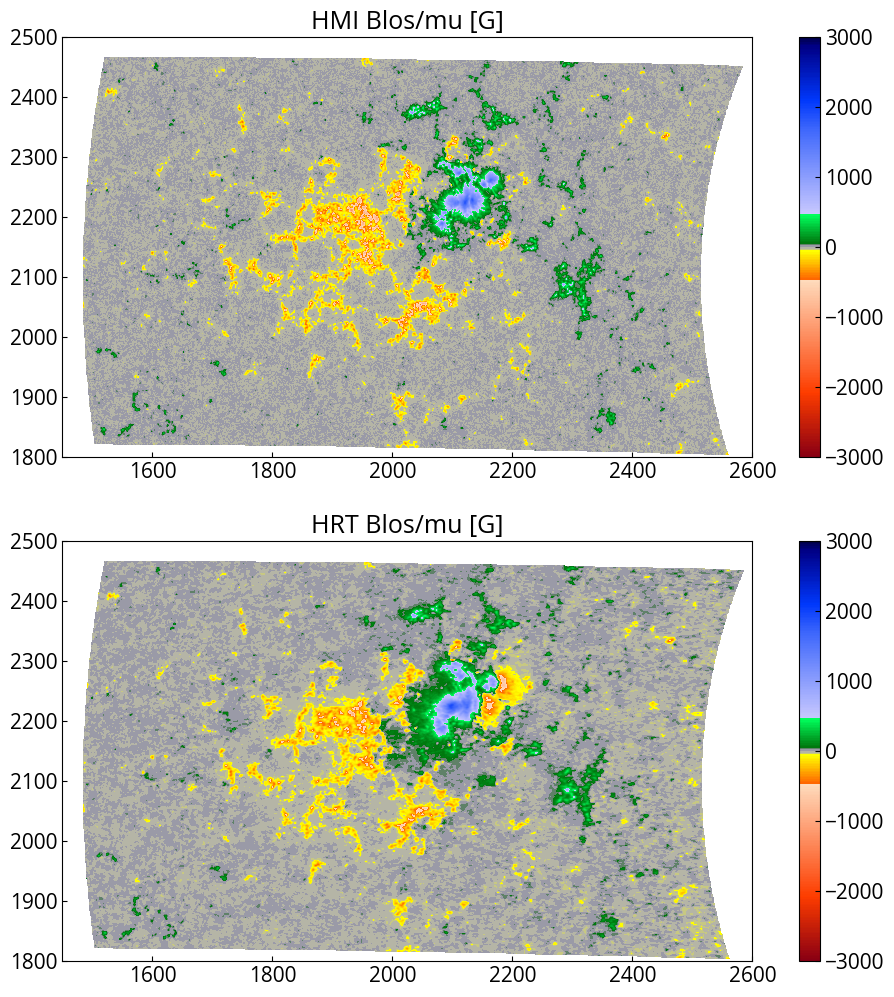

In [86]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(hmi_arr[2:-2,2:-2,126]/hmi_mu_arr[2:-2,2:-2,126],origin="lower",cmap=magmap,vmin=-3000,vmax=3000)
plt.colorbar()
plt.xlim(1450,2600)
plt.ylim(1800,2500)
plt.title('HMI Blos/mu [G]')
plt.subplot(212)
plt.imshow(hrt_arr[2:-2,2:-2,126]/hrt_mu_arr[2:-2,2:-2,126],origin="lower",cmap=magmap,vmin=-3000,vmax=3000)
plt.colorbar()
plt.title('HRT Blos/mu [G]')
plt.xlim(1450,2600)
plt.ylim(1800,2500)